In [1]:
import os
import glob

PALAVRA_1 = "R.Time (min)	Intensity"
PALAVRA_2 = "[LC Status Trace(Pump A Pressure)]"

class Cromatografia:
    def __init__(self, diretorio):
        self.diretorio = diretorio
        self.executa()

    def arquivos(self):
        os.chdir(self.diretorio)
        files = glob.glob(r'*.txt')
        os.chdir('..')
        os.chdir('..')
        return files

    def etapas(self, nmA):
        os.chdir(self.diretorio)
        entrada = nmA
        saida_rid = f'rid\\[rid][{entrada[0:-4]}].txt'
        saida_uV = f'uV\\[uV][{entrada[0:-4]}].txt'
        with open(entrada, 'r') as fp:
            # read an store all lines into list
            lines = fp.readlines()
        # Write file
        with open(saida_rid, 'w') as fp:
                # iterate each line
            a1 = []
            a2 = []
            for number, line in enumerate(lines):
                # delete line 5 and 8. or pass any Nth line you want to remove
                # note list index starts from 0
                if PALAVRA_1 in line:
                    a1.append(number)
                if PALAVRA_2 in line:
                    a2.append(number)
                
                    
            for number, line in enumerate(lines):
                if number in [i for i in range(a1[0], a2[0])]:
                    fp.write(line)
        with open(saida_uV, 'w') as fp:
                # iterate each line
            a1 = []
            a2 = []
            for number, line in enumerate(lines):
                # delete line 5 and 8. or pass any Nth line you want to remove
                # note list index starts from 0
                if PALAVRA_1 in line:
                    a1.append(number)
                if PALAVRA_2 in line:
                    a2.append(number)

            for number, line in enumerate(lines):
                if number in [i for i in range(a1[1], len(lines))]:
                    fp.write(line)
    
    def se_diretorio_existe(self):
        os.chdir(self.diretorio)
        rid = f'{self.diretorio}\\rid'
        uV = f'{self.diretorio}\\uV'
        isExist1 = os.path.exists(rid)
        isExist2 = os.path.exists(uV)
        if not (isExist1 and isExist2):  
            # Create a new directory because it does not exist 
            os.makedirs(rid)
            os.makedirs(uV)

    def executa(self):
        os.chdir(self.diretorio)
        self.se_diretorio_existe()        
        nomesArquivos = self.arquivos()
        for nmA in nomesArquivos:      
            self.etapas(nmA)


diretorio = 'D:\Google Drive Copia\python\doutorado\DATA\[HPLC]\[DATAFRAME][BRUTO]'

cr = Cromatografia(diretorio)

In [2]:
import pandas as pd
import glob

#Aqui se escolhe o detector
local = '\\brutos\\rid'
diretorio = f'D:\\Google Drive Copia\\Doutorado_Renato\\data\[OURO]\[HPLC][Ouro][CH4][KOH + H2SO4 + H2O2]\\{local}'

class Uni_colunas:
    def __init__(self, diretorio):
        self.diretorio = diretorio

    def arquivos(self):
        os.chdir(self.diretorio)
        files = glob.glob(r'*.txt')
        return files

    def etapas(self, file2):
        df2 = pd.read_csv(file2, sep='\t')
        ext_col = df2['Intensity']
        #ext_col.rename(column={'Intensity': file2[0:-4]}, inplace=True)
        self.df = self.df.join(ext_col)
        self.df.rename(columns={'Intensity': file2[6:-5]}, inplace=True)

    def executa(self):
        os.chdir(self.diretorio)
        nomesArquivos = self.arquivos()
        file1 = nomesArquivos[0]
        self.df = pd.read_csv(file1, sep='\t', decimal=',')
        self.df.rename(columns={'R.Time (min)': 'time (min)',
                                'Intensity': file1[6:-5]}, inplace=True)
        nomesArquivos2 = nomesArquivos[1:]

        for nmA in nomesArquivos2:            
            self.etapas(nmA)
        return self.df


uc = Uni_colunas(diretorio)
df = uc.executa()
df.head()

,time (min),[01][Formaldehyde],[02][Formic_Acid],[03][Isopropanol],"[04][KOH 2,0 M][24H]",[04][Metanol],"[05][KOH 2,0 M][24H]",[05][Metanol],"[06][NaOH 0,5 M + H2O2 100 uL][6h]","[07][NaOH 0,5 M][6H]"
0,0.00000,0,0.0,0,0,1,0,1,-5,1
1,0.00833,0,0.0,0,0,1,0,1,-5,1
2,0.01667,0,0.0,0,0,0,0,0,0,0
3,0.02500,0,0.0,0,0,0,0,0,-1,0
4,0.03333,0,0.0,-1,-1,-1,-1,-1,-1,-1


In [3]:
cols = df.columns
valores = []
for x in cols:
    valores.append(max(df[x]))
e = df[cols[1:]]/valores[1:]
df3 = pd.DataFrame(e)

df2 = pd.DataFrame(df[cols[0]])
df2 = df2.join(df3)
df2.tail()

,time (min),[01][Formaldehyde],[02][Formic_Acid],[03][Isopropanol],"[04][KOH 2,0 M][24H]",[04][Metanol],"[05][KOH 2,0 M][24H]",[05][Metanol],"[06][NaOH 0,5 M + H2O2 100 uL][6h]","[07][NaOH 0,5 M][6H]"
6596,54.96667,0.042621,NaN,0.003102,0.000016,-0.003792,0.000016,-0.003792,-0.000877,-0.000172
6597,54.97500,0.042621,NaN,0.003102,0.000016,-0.003792,0.000016,-0.003792,-0.000878,-0.000172
6598,54.98333,0.042621,NaN,0.003102,0.000016,-0.003760,0.000016,-0.003760,-0.000878,-0.000172
6599,54.99167,0.042621,NaN,0.003102,0.000016,-0.003760,0.000016,-0.003760,-0.000877,-0.000172
6600,55.00000,0.042621,NaN,0.003102,0.000016,-0.003792,0.000016,-0.003792,-0.000877,-0.000172


ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

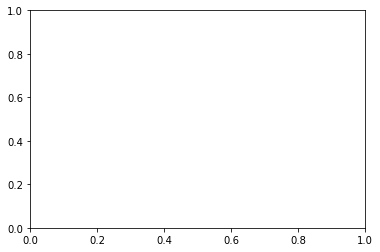

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pybaselines

# X axis parameter:
fig, ax = plt.subplots()

def plotar_dados(col):    

    df3 = df2[['time (min)', col]]
    df3 = df3.dropna()

    x, y = df3['time (min)'], df3[col]
    y2 = y
    #bkg_2 = pybaselines.whittaker.asls(y, lam=1e6, p=0.02)[0]
    #y2 = y-bkg_2
    ax.step(x, y2, linewidth=2, label = col)  

df2.drop()
cols = df2.columns[1:5]


for col in cols:
    plotar_dados(col)

ax.legend(cols)
plt.xlabel("t (min)", fontsize = 20, fontweight = 'bold' )
plt.ylabel("Intensity", fontsize = 20, fontweight = 'bold' )
fig.set_size_inches(20, 10)
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
plt.ylim(-0.02, 0.3) 
plt.show()